<a href="https://colab.research.google.com/github/Bast1-py/Experience-Developing-Projects/blob/main/Sentiment_Analysis_of_E_commerce_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install Sastrawi

In [ ]:
# Import Library
import string, re, nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/dataset_shopee2.csv', sep=',', encoding='latin1')
df

,Review,SENTIMEN
0,puas belanja di shopee banyak diskon dan grati...,POSITIF
1,Aplikasi yang bagus dan sangat membantu,POSITIF
2,saya kecewa kenapa sekarang Shopee sangat eror...,NEGATIF
3,Shope sangat bagus bagi saya saya suka banget ...,POSITIF
4,Kecewa Katanya gratis ongkir . Ternyata mahaln...,NEGATIF
...,...,...
890,"semakin kesini semakin buruk aplikasi shopee,b...",NEGATIF
891,kenapaa tidak ada sope pay laternya yaaa punya...,NEGATIF
892,Aplikasi shopeenya lemot banget waktu digunakan,NEGATIF
893,Aplikasi belanja online terburuk yang pernah s...,NEGATIF


In [ ]:
# proses membersihkan data
# Case Folding

def casefolding(Review):
  review = Review.lower()
  return review
df['Review'] = df['Review'].apply(casefolding)
df

,Review,SENTIMEN
0,puas belanja di shopee banyak diskon dan grati...,POSITIF
1,aplikasi yang bagus dan sangat membantu,POSITIF
2,saya kecewa kenapa sekarang shopee sangat eror...,NEGATIF
3,shope sangat bagus bagi saya saya suka banget ...,POSITIF
4,kecewa katanya gratis ongkir . ternyata mahaln...,NEGATIF
...,...,...
890,"semakin kesini semakin buruk aplikasi shopee,b...",NEGATIF
891,kenapaa tidak ada sope pay laternya yaaa punya...,NEGATIF
892,aplikasi shopeenya lemot banget waktu digunakan,NEGATIF
893,aplikasi belanja online terburuk yang pernah s...,NEGATIF


In [ ]:
# membersihkan data dengan regex
def cleansing(Review):
  review = Review.strip(" ")
  Review = re.sub(r'[?|$|.|!_:")(-+,]', '', Review)
  Review = re.sub(r'\d+', '', Review)
  Review = re.sub(r"\b[a-zA-Z]\b", "", Review)
  Review = re.sub('\s+',' ', Review)
  return Review
df['Review'] = df['Review'].apply(cleansing)
df

,Review,SENTIMEN
0,puas belanja di shopee banyak diskon dan grati...,POSITIF
1,aplikasi yang bagus dan sangat membantu,POSITIF
2,saya kecewa kenapa sekarang shopee sangat eror...,NEGATIF
3,shope sangat bagus bagi saya saya suka banget ...,POSITIF
4,kecewa katanya gratis ongkir ternyata mahalnya...,NEGATIF
...,...,...
890,semakin kesini semakin buruk aplikasi shopeeba...,NEGATIF
891,kenapaa tidak ada sope pay laternya yaaa punya...,NEGATIF
892,aplikasi shopeenya lemot banget waktu digunakan,NEGATIF
893,aplikasi belanja online terburuk yang pernah s...,NEGATIF


In [ ]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)
df['Review'] = df['Review'].apply(word_tokenize_wrapper)
df

,Review,SENTIMEN
0,"[puas, belanja, di, shopee, banyak, diskon, da...",POSITIF
1,"[aplikasi, yang, bagus, dan, sangat, membantu]",POSITIF
2,"[saya, kecewa, kenapa, sekarang, shopee, sanga...",NEGATIF
3,"[shope, sangat, bagus, bagi, saya, saya, suka,...",POSITIF
4,"[kecewa, katanya, gratis, ongkir, ternyata, ma...",NEGATIF
...,...,...
890,"[semakin, kesini, semakin, buruk, aplikasi, sh...",NEGATIF
891,"[kenapaa, tidak, ada, sope, pay, laternya, yaa...",NEGATIF
892,"[aplikasi, shopeenya, lemot, banget, waktu, di...",NEGATIF
893,"[aplikasi, belanja, online, terburuk, yang, pe...",NEGATIF


In [ ]:
# Stemming
def stemming(Review):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in Review:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean
df['Review'] = df['Review'].apply(stemming)
df.to_csv('sudah_clean.csv', index=False)
df_clean = pd.read_csv('sudah_clean.csv', encoding='latin1')
df_clean

puas belanja di shopee banyak diskon dan gratis ongkir jual baik dan kurir sopan
aplikasi yang bagus dan sangat bantu
saya kecewa kenapa sekarang shopee sangat eror mau checkout aja susah
shope sangat bagus bagi saya saya suka banget sama shopee
kecewa kata gratis ongkir nyata mahal gak bisa bayar di tempat pula
kecewa dengan ubah ekspedisi kirim bukan cepet malah tambah lama bukan ongkirnya murah malah mahal
bagus banget aku puas emas rapi banget makasih ya seller
aplikasi sangat bagus dan banyak bonus
aplikasi sering eror bikin pusing susah bayar susah cari juga
saya udh kecewa banget uang saya belum kembali soal pesan
shopee emang keren banget tapi sayang shopee later gak bisa pakai
untuk sampai saat ini masih bagus tahan yah
bagus tingkat terus ya shopee
shopee keren cuman ada yang jual terlalu mahal barang mesti ken
bagus banget aplikasi
lebih barang yang jual lengkap dari dalam sampai luat negeri ada proses bayar mudah dan aman kurang sering loading lama banget cuman mau masukin 

,Review,SENTIMEN
0,puas belanja di shopee banyak diskon dan grati...,POSITIF
1,aplikasi yang bagus dan sangat bantu,POSITIF
2,saya kecewa kenapa sekarang shopee sangat eror...,NEGATIF
3,shope sangat bagus bagi saya saya suka banget ...,POSITIF
4,kecewa kata gratis ongkir nyata mahal gak bisa...,NEGATIF
...,...,...
890,makin kesini makin buruk aplikasi shopeebaru i...,NEGATIF
891,kenapaa tidak ada sope pay laternya yaaa punya...,NEGATIF
892,aplikasi shopeenya lot banget waktu guna,NEGATIF
893,aplikasi belanja online buruk yang pernah saya...,NEGATIF


In [ ]:
df_clean = pd.read_csv('sudah_clean.csv', encoding='latin1')
df_clean

,Review,SENTIMEN
0,puas belanja di shopee banyak diskon dan grati...,POSITIF
1,aplikasi yang bagus dan sangat bantu,POSITIF
2,saya kecewa kenapa sekarang shopee sangat eror...,NEGATIF
3,shope sangat bagus bagi saya saya suka banget ...,POSITIF
4,kecewa kata gratis ongkir nyata mahal gak bisa...,NEGATIF
...,...,...
890,makin kesini makin buruk aplikasi shopeebaru i...,NEGATIF
891,kenapaa tidak ada sope pay laternya yaaa punya...,NEGATIF
892,aplikasi shopeenya lot banget waktu guna,NEGATIF
893,aplikasi belanja online buruk yang pernah saya...,NEGATIF


In [ ]:
df_clean = df_clean.astype({'SENTIMEN' : 'category'})
df_clean = df_clean.astype({'Review' : 'string'})
df_clean.dtypes

Review      string[python]
SENTIMEN          category
dtype: object

In [ ]:
# menghitung TF-IDF
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df_clean['Review'].astype('U'))
tf = TfidfVectorizer()
text_df = tf.fit_transform(df_clean['Review'].astype('U'))
print(text_df)

  (0, 2082)	0.4203357107817702
  (0, 1079)	0.3261757705404655
  (0, 169)	0.24012210547552218
  (0, 891)	0.2808154375717062
  (0, 1549)	0.22401576630850495
  (0, 708)	0.23117206740614463
  (0, 451)	0.3909537554603142
  (0, 523)	0.3413321356287611
  (0, 201)	0.22554216850952946
  (0, 1975)	0.13659414406472228
  (0, 487)	0.1559953390846936
  (0, 236)	0.18081811222577512
  (0, 1755)	0.2843911073126277
  (1, 198)	0.5404314383144574
  (1, 1867)	0.4416610293871539
  (1, 161)	0.39226653981795007
  (1, 2414)	0.33182896130711836
  (1, 115)	0.3383628223442375
  (1, 451)	0.3666012796409473
  (2, 2135)	0.36860123884848045
  (2, 31)	0.27580553565184
  (2, 402)	0.44918203093955744
  (2, 1273)	0.2540109746706368
  (2, 608)	0.38107564166693725
  (2, 1915)	0.26613107662828983
  :	:
  (891, 2247)	0.15060779979923028
  (891, 10)	0.1445398516222599
  (891, 1598)	0.16765599977100396
  (891, 51)	0.3627064149988465
  (891, 1112)	0.1717988123390778
  (892, 1988)	0.5836678082510354
  (892, 718)	0.36747433385084

In [ ]:
cos_sim = cosine_similarity(text_df, text_df)
print(cos_sim)

[[1.         0.14332415 0.02108479 ... 0.         0.03189007 0.303812  ]
 [0.14332415 1.         0.11753973 ... 0.08181863 0.17635474 0.        ]
 [0.02108479 0.11753973 1.         ... 0.         0.036038   0.04844394]
 ...
 [0.         0.08181863 0.         ... 1.         0.08510504 0.        ]
 [0.03189007 0.17635474 0.036038   ... 0.08510504 1.         0.07326992]
 [0.303812   0.         0.04844394 ... 0.         0.07326992 1.        ]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cos_sim, df_clean['SENTIMEN'], test_size=0.2, random_state=42)
print('Jumlah data yang di Latih:', X_train.shape)
print('Jumlah data yang di uji:', X_test.shape)
positif_test = (y_test == 'POSITIF').sum()
negatif_test = (y_test == 'NEGATIF').sum()
positif_train = (y_train == 'POSITIF').sum()
negatif_train = (y_train == 'NEGATIF').sum()
print('Menghitung data yang di uji memiliki bobot sentiment yang positive adalah:', positif_test)
print('Menghitung data yang di uji memiliki bobot sentiment yang negative adalah:', negatif_test)
print('Menghitung data yang di train memiliki bobot sentiment yang positive adalah:', positif_train)
print('Menghitung data yang di train memiliki bobot sentiment yang negative adalah:', negatif_train)
df_clean['SENTIMEN'].value_counts()

Jumlah data yang di Latih: (716, 895)
Jumlah data yang di uji: (179, 895)
Menghitung data yang di uji memiliki bobot sentiment yang positive adalah: 97
Menghitung data yang di uji memiliki bobot sentiment yang negative adalah: 82
Menghitung data yang di train memiliki bobot sentiment yang positive adalah: 372
Menghitung data yang di train memiliki bobot sentiment yang negative adalah: 344


SENTIMEN
POSITIF    469
NEGATIF    426
Name: count, dtype: int64

Memprediksi model dengan menggunakan algoritma **K-Nearest Neighbors (KNN)**

KNN Accuracy: 0.8547486033519553
KNN Precision: 0.9493670886075949
KNN Recall: 0.7731958762886598
KNN F1 Score: 0.8522727272727272
Error Rate: 0.14525139664804465

              precision    recall  f1-score   support

     NEGATIF       0.78      0.95      0.86        82
     POSITIF       0.95      0.77      0.85        97

    accuracy                           0.85       179
   macro avg       0.86      0.86      0.85       179
weighted avg       0.87      0.85      0.85       179




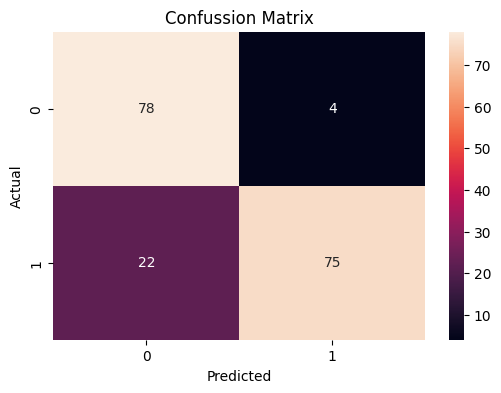


True Negative: 78
False Positive: 4
False Negative: 22
True Positive: 75


In [ ]:
algo_knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
pred_knn = algo_knn.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred_knn).ravel()
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, pred_knn), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confussion Matrix')
print('KNN Accuracy:', accuracy_score(y_test, pred_knn))
print('KNN Precision:', precision_score(y_test, pred_knn, average='binary', pos_label='POSITIF'))
print('KNN Recall:', recall_score(y_test, pred_knn, average='binary', pos_label='POSITIF'))
print('KNN F1 Score:', f1_score(y_test, pred_knn, average='binary', pos_label='POSITIF'))
print('Error Rate:', 1-accuracy_score(y_test, pred_knn))
print('================================================================================================\n')
print(classification_report(y_test, pred_knn))
print('================================================================================================\n')
plt.show()
print('================================================================================================\n')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Memprediksi model dengan menggunakan algoritma **Decision Tree**

Decision Tree Accuracy: 0.7653631284916201
Decision Tree Precision: 0.7835051546391752
Decision Tree Recall: 0.7835051546391752
Decision Tree F1 Score: 0.7835051546391752
Error Rate: 0.23463687150837986

              precision    recall  f1-score   support

     NEGATIF       0.74      0.74      0.74        82
     POSITIF       0.78      0.78      0.78        97

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179




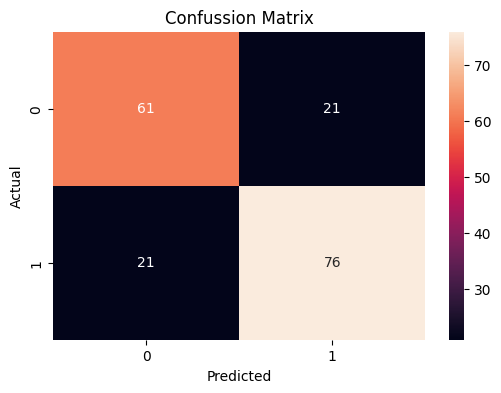


True Negative: 61
False Positive: 21
False Negative: 21
True Positive: 76


In [ ]:
algo_dt = DecisionTreeClassifier().fit(X_train, y_train)
pred_dt = algo_dt.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred_dt).ravel()
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, pred_dt), annot=True, fmt='.0f', ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confussion Matrix')
print('Decision Tree Accuracy:', accuracy_score(y_test, pred_dt))
print('Decision Tree Precision:', precision_score(y_test, pred_dt, average='binary', pos_label='POSITIF'))
print('Decision Tree Recall:', recall_score(y_test, pred_dt, average='binary', pos_label='POSITIF'))
print('Decision Tree F1 Score:', f1_score(y_test, pred_dt, average='binary', pos_label='POSITIF'))
print('Error Rate:', 1-accuracy_score(y_test, pred_dt))
print('================================================================================================\n')
print(classification_report(y_test, pred_dt))
print('================================================================================================\n')
plt.show()
print('================================================================================================\n')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')